In [3]:
import matplotlib
import tensorflow as tf
import PIL
#from Cython import inline
from PIL import Image
import os
from tensorflow.keras.preprocessing import image
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import keras

In [4]:
trainpath = 'C:\\Users\\thiru\\inaturalist_12K\\train\\'
testpath = 'C:\\Users\\thiru\\inaturalist_12K\\val\\'

In [5]:
for folder in  os.listdir(trainpath + 'seg_train') :
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')
for folder in  os.listdir(testpath +'seg_test') :
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For training data , found 1000 in folder Amphibia
For training data , found 1000 in folder Animalia
For training data , found 1000 in folder Arachnida
For training data , found 1000 in folder Aves
For training data , found 999 in folder Fungi
For training data , found 1000 in folder Insecta
For training data , found 1000 in folder Mammalia
For training data , found 1000 in folder Mollusca
For training data , found 1000 in folder Plantae
For training data , found 1000 in folder Reptilia
For testing data , found 200 in folder Amphibia
For testing data , found 200 in folder Animalia
For testing data , found 200 in folder Arachnida
For testing data , found 200 in folder Aves
For testing data , found 200 in folder Fungi
For testing data , found 200 in folder Insecta
For testing data , found 200 in folder Mammalia
For testing data , found 200 in folder Mollusca
For testing data , found 200 in folder Plantae
For testing data , found 200 in folder Reptilia


In [8]:
code_to_num = {'Amphibia':0 ,'Animalia':1, 'Arachnida':2, 'Aves':3,  'Fungi':4,'Insecta':5,'Mammalia':6,'Mollusca':7,'Plantae':8,'Reptilia':9}
num_to_code = {0:'Amphibia' ,1:'Animalia', 2:'Arachnida', 3:'Aves', 4:'Fungi',5:'Insecta',6:'Mammalia',7:'Mollusca',8:'Plantae',9:'Reptilia'}

def get_code(n) : 
    if n in num_to_code:
        return num_to_code[n]    

def get_num(c):
    if c in code_to_num:
        return code_to_num[c] 

In [2]:
s = 200

In [9]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(get_num(folder))

In [11]:
print(f'we have {len(X_train)} items in X_train')

we have 9999 items in X_train


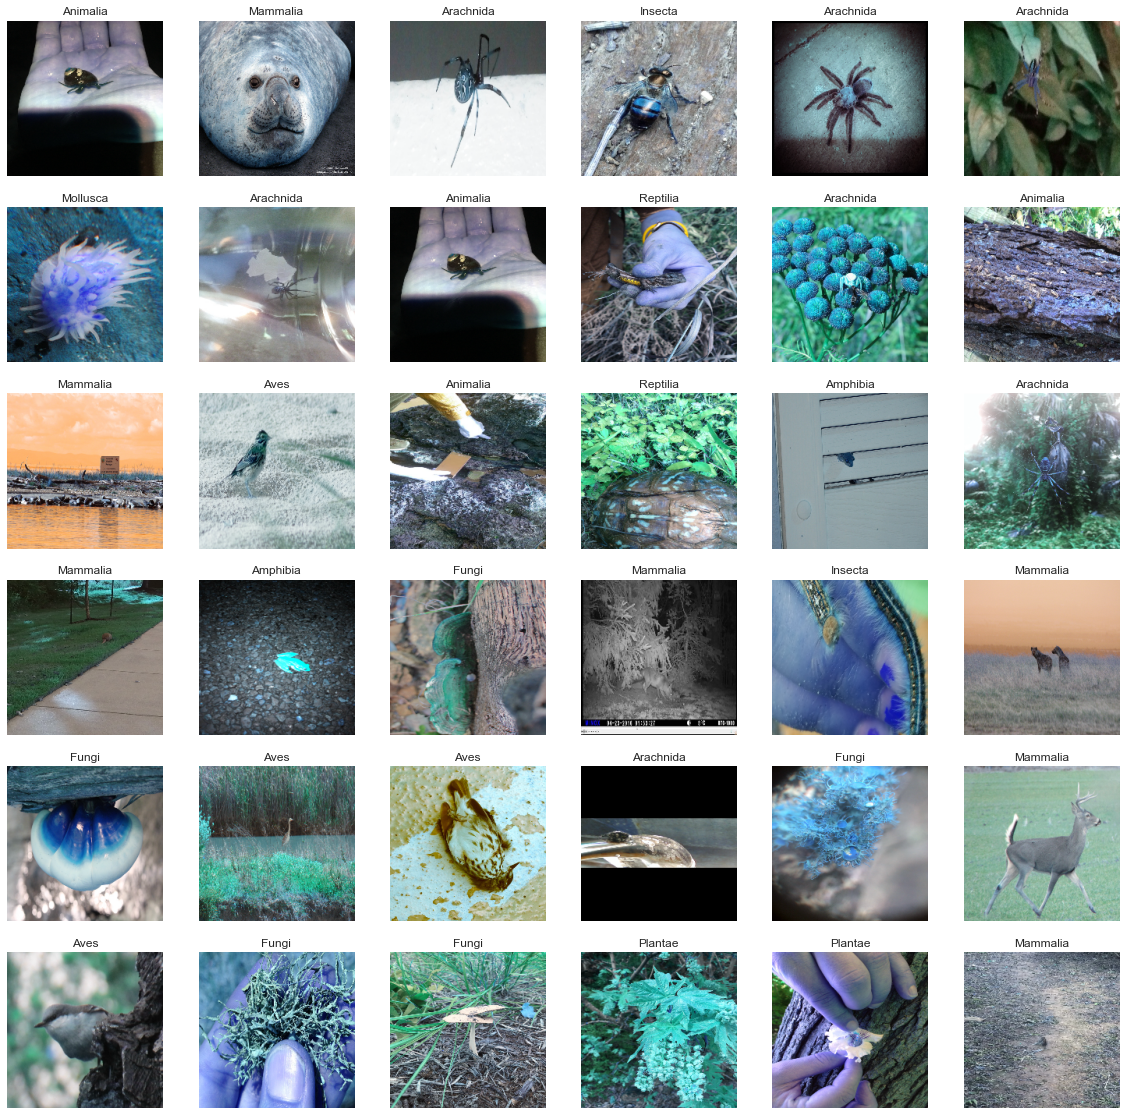

In [12]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(get_code(y_train[i]))
   

In [13]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(get_num(folder))
          

In [14]:
print(f'we have {len(X_test)} items in X_test')

we have 2000 items in X_test


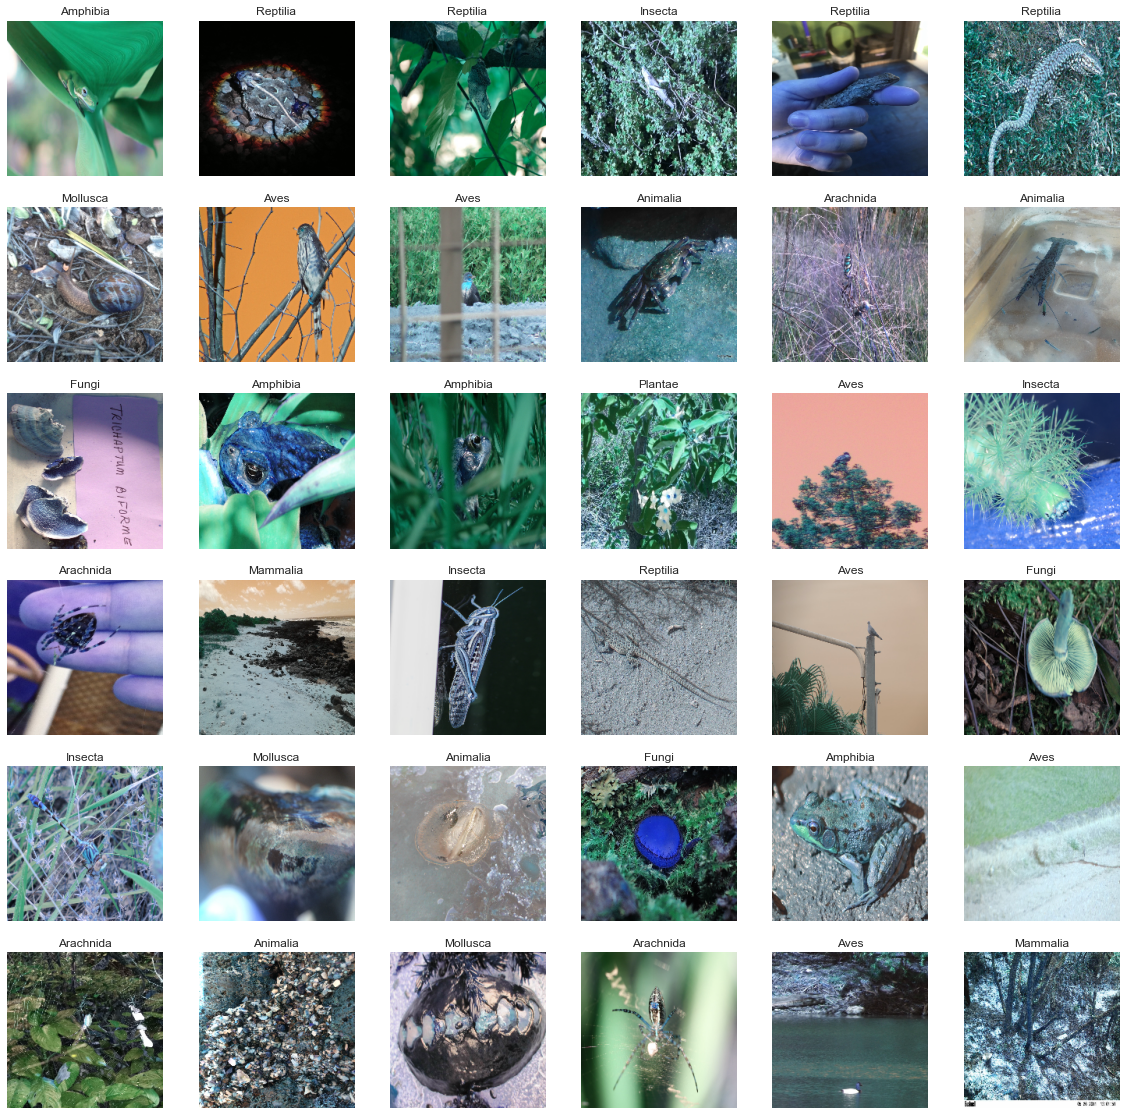

In [15]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(get_code(y_test[i]))

In [16]:
X_train[0]


[array([[166, 234, 255],
        [164, 235, 255],
        [165, 239, 255],
        [166, 241, 255],
        [162, 239, 254],
        [157, 233, 254],
        [151, 215, 248],
        [128, 173, 217],
        [113, 171, 219],
        [121, 181, 217],
        [146, 205, 236],
        [160, 215, 252],
        [138, 190, 229],
        [ 82, 123, 155],
        [ 80, 102, 125],
        [ 83,  94, 111],
        [ 89, 115, 136],
        [137, 176, 190],
        [140, 195, 209],
        [105, 171, 190],
        [115, 168, 194],
        [124, 175, 212],
        [116, 165, 209],
        [137, 189, 230],
        [161, 208, 236],
        [163, 220, 252],
        [158, 221, 254],
        [159, 222, 252],
        [143, 211, 241],
        [149, 174, 200],
        [163, 170, 178],
        [163, 189, 175],
        [167, 196, 187],
        [170, 193, 186],
        [182, 203, 200],
        [184, 211, 208],
        [178, 197, 197],
        [195, 208, 201],
        [170, 186, 181],
        [132, 160, 167],


In [17]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (9999, 200, 200, 3)
X_test shape  is (2000, 200, 200, 3)
y_train shape  is (9999,)
y_test shape  is (2000,)


In [19]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3),padding = "same"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding = "same"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = "same"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
]
)

In [20]:
from tensorflow.keras.optimizers import Adam
KerasModel.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr= .001),metrics=['accuracy'] )

In [21]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
dense (Dense)                (None,

In [24]:
ThisModel = KerasModel.fit(X_train,y_train,epochs = 1)

313/313 [==============================] - 383s 1s/step - loss: 0.3100 - accuracy: 0.9075


In [25]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

63/63 [==============================] - 11s 170ms/step - loss: 8.6638 - accuracy: 0.1615
Test Loss is 8.663789749145508
Test Accuracy is 0.1615000069141388
